In [31]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [4]:
df = pd.read_csv('/home/fm-pc-lt-173/fraud_detection/pythonProject/data/final_features.csv')
print(df.shape)
# df.head(5)
print(df.dtypes)

(1296675, 16)
merchant              object
category              object
amt                  float64
gender                object
city                  object
state                 object
job                   object
trans_num             object
is_fraud               int64
trans_month_sin      float64
trans_month_cos      float64
trans_hour_sin       float64
trans_hour_cos       float64
age                  float64
distance             float64
city_pop_category     object
dtype: object


In [6]:
# df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
# df['dob'] = pd.to_datetime(df['dob'])

**<h2>Training Decision Tree using the features to generate feature importance.</h2>**

In [7]:
def preprocess_data():
#     numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long','cc_num']
#     categorical_features = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'trans_num']
    numerical_features = ['amt','trans_month_sin', 'trans_month_cos', 'trans_hour_sin', 'trans_hour_cos','age','distance']
    categorical_features = ['merchant', 'category','gender','city','state', 'job','trans_num']
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    preprocessor = ColumnTransformer(
        transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
    return preprocessor

<h2>Decision Tree</h2>

In [18]:
# Define features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = preprocess_data()

print("here")
# Create the pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=10))
])

print("here 2")
# Train the model
clf.fit(X_train, y_train)

# Save pipeline (including preprocessor and classifier) to a file
# dump(clf, 'pipeline_with_model.joblib')

print("here 3")

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

here
here 2
here 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.88      0.70      0.78      1520

    accuracy                           1.00    259335
   macro avg       0.94      0.85      0.89    259335
weighted avg       1.00      1.00      1.00    259335



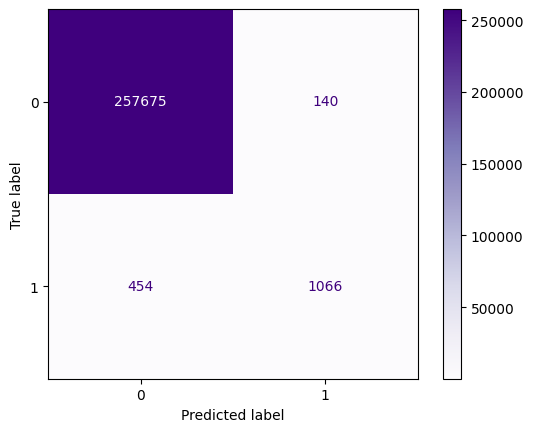

In [19]:
ConfusionMatrixDisplay.from_estimator(clf, X_test,y_test,cmap='Purples')

In [20]:
joblib.dump(clf,'/home/fm-pc-lt-173/fraud_detection/pythonProject/data/decisiontree_default_setup.joblib')

['/home/fm-pc-lt-173/fraud_detection/pythonProject/data/decisiontree_default_setup.joblib']

In [21]:
# Get the names of the numerical features
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
categorical_features = ['merchant', 'category','gender','city','state', 'job','trans_num']

# Get the names of the categorical features after one-hot encoding
categorical_transformer = clf.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names = categorical_transformer.get_feature_names_out(categorical_features)

# Combine the names
feature_names = list(numerical_features) + list(categorical_feature_names)

In [22]:
# Calculate feature importances
# feature_importances = clf.feature_importances_
feature_importances = clf.named_steps['classifier'].feature_importances_
print(len(feature_importances))

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# # Visualize feature importances
# plt.figure(figsize=(10, 8))
# plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances')
# plt.gca().invert_yaxis()
# plt.show()

# # Print the feature importances
# print(feature_importances_df)

1039495


In [23]:
feature_importances_df.to_csv("/home/fm-pc-lt-173/fraud_detection/pythonProject/data/dt-defeault_setup_ft_imp.csv")

In [ ]:
top_100_feature_importances_df = feature_importances_df.sort_values(['importance'], ascending=False).tail(100)
pd.set_option('display.max_rows', None)
top_100_feature_importances_df

**<h2>Insights</h2>**
<li><b>Including all the feature columns</b></li>
<li><b>Numerical feature columns and categorical columns were scaled using standardscaler and encoded using onehotencoder respectively</b></li>
<li><b>Random Forest Classifier is used to generate the feature importance</b></li>
<li><b>Total 4941 features is created to fit into the model</b></li>
<li><b>Out of all the features; amt, unix_time, merch_long, merch_lat, category, city_pop,lat,long,gender,merchant,job are some of the top features found</b></li>
<li><b>Similarly, zip, street, first,last are some of the low ranking features found</b></li>